## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [1]:
import pandas as pd #is a library used to analysed, manipulate and cleand ata
import numpy as np
df = pd.read_csv('cleaned_ecommerce_dataset.csv') #importing the dataset


In [2]:
len(df) #length of the dataset is 2685 which means there are 2685 rows

2685

## comment

Packages have been imported to help analyse the data and introducing the csv file to extract data from the excel and storing in a variable called df. the Length function was also used to check the amount of rows in the excel table.

### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [3]:
from sklearn.preprocessing import OrdinalEncoder #the library helps convert categorical values to numerical
ord_encoder = OrdinalEncoder() #transforms values into ordinal integers
df.head()#gets the first 5 rows of the dataset

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [4]:
df.info()#shows the number of columns, column labels and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [5]:
df['helpfulness'].corr(df['rating']) #this is a very weak negative correlation with value close to zero

-0.007523337726844622

In [6]:
df["category"] = ord_encoder.fit_transform(df[['category']]) #transforming 'category' from a categorical value to numerical

In [7]:
df["category"].corr(df['rating']) #the correlation between category and rating is a weak negative relationship

-0.16315765340915653

In [8]:
df["gender"] = ord_encoder.fit_transform(df[["gender"]]) #transforming 'gender' from a categorical to numerical value

In [9]:
df["gender"].corr(df['rating']) #does not show a meaningful linear between gender and rating.

-0.03433661424208281

In [10]:
df["review"] = ord_encoder.fit_transform(df[["review"]]) #converting 'review' to a numerical value

In [11]:
df["review"].corr(df["rating"]) #shows a negative and  weak association between reivew and rating


-0.03611838655212241

## comment

The ord encoder is used to change the categorical values to numerical as gender, review and categpory were not associated with numerical values. all four values in relation to review had a weak correlation which means between each value and review, they do not have great associated between each other. However, the strongest correlated feature among the four values are category with the value of -0.16 and the least correlation feature is helpfulness in relation to rating

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [12]:
from sklearn.model_selection import train_test_split #utilised by checking the performance of the machine learning algorithm
from sklearn import datasets, linear_model


In [13]:
train_c1, test_c1 = train_test_split(df, test_size=0.9, random_state = 142) #checks 10% of the data for case 1
print(train_c1.shape) #shows the number of elements for training model which indicates the value of the dimention
print(test_c1.shape) #shows the number of elements for testing model which indicates the value of the dimention

(268, 11)
(2417, 11)


In [14]:
train_c2, test_c2 = train_test_split(df, test_size=0.1, random_state = 142) #checks 90% of the training data for case 2
print(train_c2.shape) #shows number of elements for training model which indicates the value of the dimention for case 2
print(test_c2.shape)  #shows number of elements for testing model which indicates the value of the dimention for case 2


(2416, 11)
(269, 11)


## Comment

the current model is used to train the data and then eventually test the accuracy of the testing set. Moreover, it will determine how great the given model is performing and to make sure the model is on the right track with its performance. Two cases are being trained and tested, case 1 is training 10% and 90% testing the data while case 2 is training 90 % of the data and testing the other 10%. When getting the shape of the dataset, the case1 known as c1 training data is 268 rows which is 10% of the trained data and 2417 which is 90% of the test size data. and case2 also know as c2 trained data is 2416 which is 90%  and 269 which is 10% of the test data

### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [15]:
reg_moda = linear_model.LinearRegression() #to establish a linear model in the dataset and to show predictions for model a
X_train_moda = train_c1[['category', 'review']] #training model a for case1
y_train_moda = train_c1['rating'] #using the training model for rating


X_test_moda = test_c1[['category', 'review']] #testing model a for case 1
y_test_moda = test_c1['rating'] #utilising testing model with rating

reg_moda.fit(X_train_moda, y_train_moda) #helps fit the model which establishes instances for



LinearRegression()

In [19]:
reg_modb = linear_model.LinearRegression()

In [20]:
reg_modb = linear_model.LinearRegression() #to establish a linear model in the dataset and to show predictions for model b
X_train_modb = train_c1[['helpfulness', 'gender']] #training model b for case 1
y_train_modb = train_c1['rating']

X_test_modb = test_c1[['helpfulness', 'gender']] #testing model b for case 1
y_test_modb = test_c1['rating']

reg_modb.fit(X_train_modb, y_train_modb) #helps fit the model which establishes training instances for model b

LinearRegression()

In [21]:
reg_modc = linear_model.LinearRegression() #to establish a linear model in the dataset and to show predictions for model c
X_train_modc = train_c2[['category', 'review']] #training model c for case 2
y_train_modc = train_c2['rating']

X_test_modc = test_c2[['category', 'review']] #testing model c for case 2
y_test_modc = test_c2['rating']

reg_modc.fit(X_train_modc, y_train_modc) #helps fit the model which establishes training instances for model c

LinearRegression()

In [22]:
reg_modd = linear_model.LinearRegression() #to establish a linear model in the dataset and to show predictions for model d
X_train_modd = train_c2[['helpfulness', 'gender']] #training model d for case 2
y_train_modd = train_c2['rating']

X_test_modd = test_c2[['helpfulness', 'gender']]#testing model c for case 2
y_test_modd = test_c2['rating']

reg_modd.fit(X_train_modd, y_train_modd) #helps fit the model which establishes training instances for model d

LinearRegression()

## Comment


The code shown shows each model which are model a,b,c and which includes the trained and test data for both case 1 and 2. Model A and C being the two most correlated features and Model b and d having the two least correlated features. Category and review are the most correlated features and put together with rating to be trained and tested for all models and than the model is fitted to train the machine learning model of this given dataset.

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [35]:
predicted_moda = reg_moda.predict(X_test_moda)# helps predict the label of the dataset.
mse_moda = ((np.array(y_test_moda)-predicted_moda)**2).sum()/len(y_test_moda) #helps gets the mean squared error for model b

print("The mean squared error value for model-a is:", mse_moda) #print  the MSE value for model a 
print("The square rooted value for model-a is:", np.sqrt(mse_moda)) #prints the rooted mse value for model a

The mean squared error value for model-a is: 1.7690740179517055
The square rooted value for model-a is: 1.3300654186737229


In [36]:
predicted_modb = reg_modb.predict(X_test_modb)
mse_modb = ((np.array(y_test_modb)-predicted_modb)**2).sum()/len(y_test_modb) #formula used to calculate MSE for model b
root_modb = np.sqrt(mse_modb)
print("The mean squared error value for model-b is:", mse_modb) #print  the MSE value for model b 
print("The mean squared rooted value for model-b is", root_modb) #prints the rooted mse value for model b

The mean squared error value for model-b is: 1.8412549895856636
The mean squared rooted value for model-b is 1.356928513071217


In [37]:
predicted_modc = reg_modc.predict(X_test_modc)
mse_modc = ((np.array(y_test_modc)-predicted_modc)**2).sum()/len(y_test_modc)  #formula used to calculate MSE for model c
    
print("The mean squared error value for model-c is:", mse_modc) #print  the MSE value for model c
print("The mean squared rooted value for model-c is", np.sqrt(mse_modc)) #prints the rooted mse value for model c 

The mean squared error value for model-c is: 1.7588975359805048
The mean squared rooted value for model-c is 1.3262343442923294


In [38]:
predicted_modd = reg_modd.predict(X_test_modd)
mse_modd = ((np.array(y_test_modd)-predicted_modd)**2).sum()/len(y_test_modd) #formula used to calculate MSE for model d

print("The mean squared error value for model-d is:", mse_modd) #print  the MSE value for model d
print("The mean squared rooted value for model-d is", np.sqrt(mse_modd)) #prints the rooted mse value for model d

The mean squared error value for model-d is: 1.8109460127732369
The mean squared rooted value for model-d is 1.3457139416581954


## Comment

Once the model is fitted, the data is than predicted for each test model that was based on the previous data and than the mean squared error formula is calculate and also the square root of the mean squared error is calculated. MSE is helpful to measure and ensure that a trained model has minimal outlier predictions with errros. RMSE helps establish how great the model is able to predict. The lower the MSE and RMSE value, the better the predictions. In this case, model a(1.769 MSE) and model c (1.756 MSE) are the most correlated features while model b (1.84 MSE) and model d (1.81 MSE) are the least correlated features.


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [39]:
#Importing these libraries to create the following bar plots.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt

In [40]:
check = ['A', 'B', 'C', 'D'] # storing the model values in an array 

In [41]:
msemod_checking = [mse_moda, mse_modb, mse_modc, mse_modd] #storing each model MSE values in an array

In [42]:
msemod_square_checking = [np.sqrt(mse_moda), np.sqrt(mse_modb), np.sqrt(mse_modc), np.sqrt(mse_modd)] # storing the root MSE values in array


Text(0, 0.5, 'MSE Values')

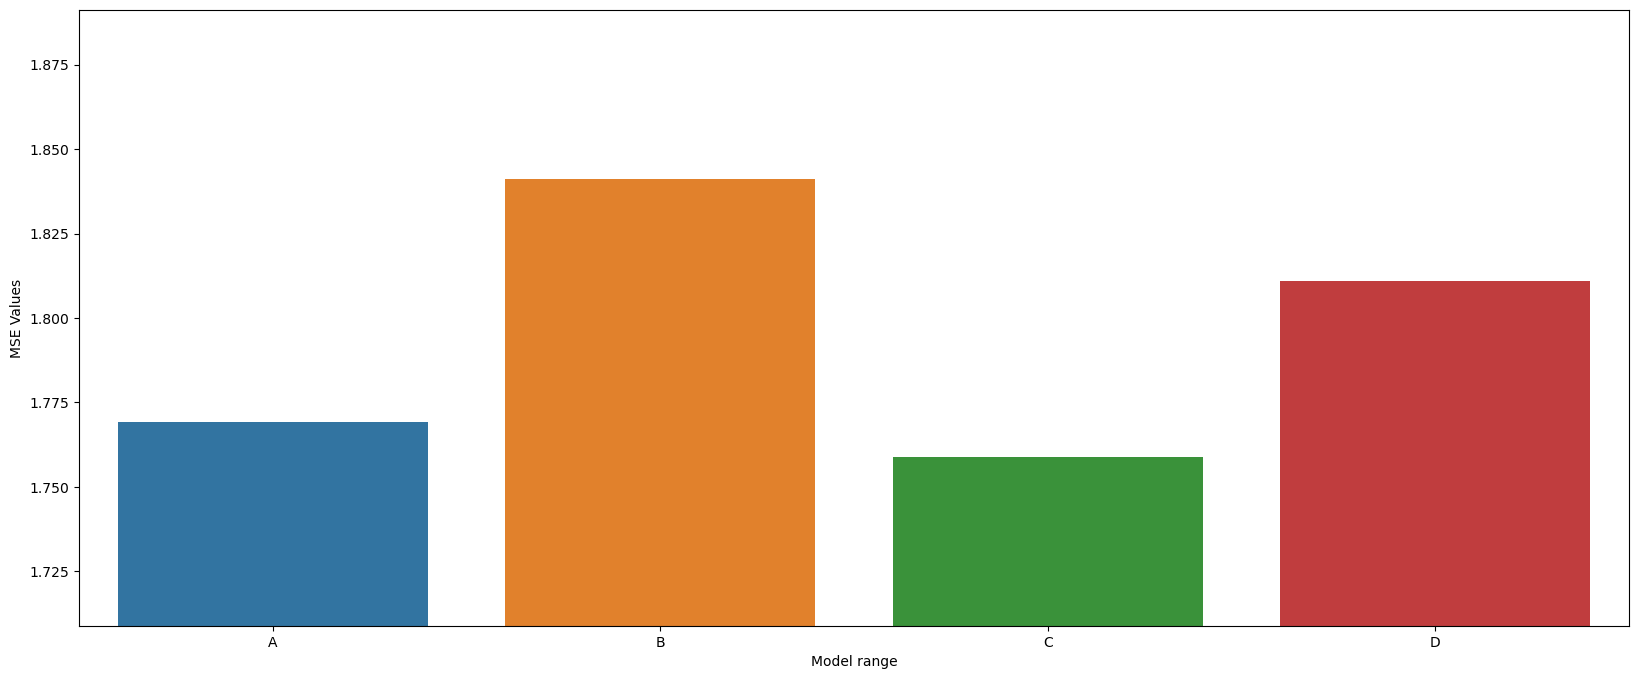

In [45]:
plt.figure(figsize = (20,8))#establishes the width and height of the graph
plt.ylim(min(msemod_checking) - 0.05, max(msemod_checking) +0.05)# increases the value by .05 from the y axis
sns.barplot(x = check, y = msemod_checking)#using seaborn to create the graph x being models and y being mse
plt.xlabel('Model range')  #title for axis 
plt.ylabel('MSE Values') #title for y axis

## Comment

Seaborn is used to create the bar plot which contains model-a, model-b, model-c and model d(in the x-axis) which shows the values of the MSE(in the y-axis). The models that have the lowest MSE values tend to be the most correlated and vise-versa. In this case, Model a(training data of 10%) and model c(training data of 90 %) are the two most correlated models with the MSE values of 1.769 and 1.759(3 dp)  while model b and model d are the least correlated models witht MSE values of 1.841 and 1.811(3 dp) This graph proves the prediction of the test set is correct and that the data with training values of 10% tend to show more correlation than the training values of 90% for the dataset. .

Text(0, 0.5, 'RMSE values')

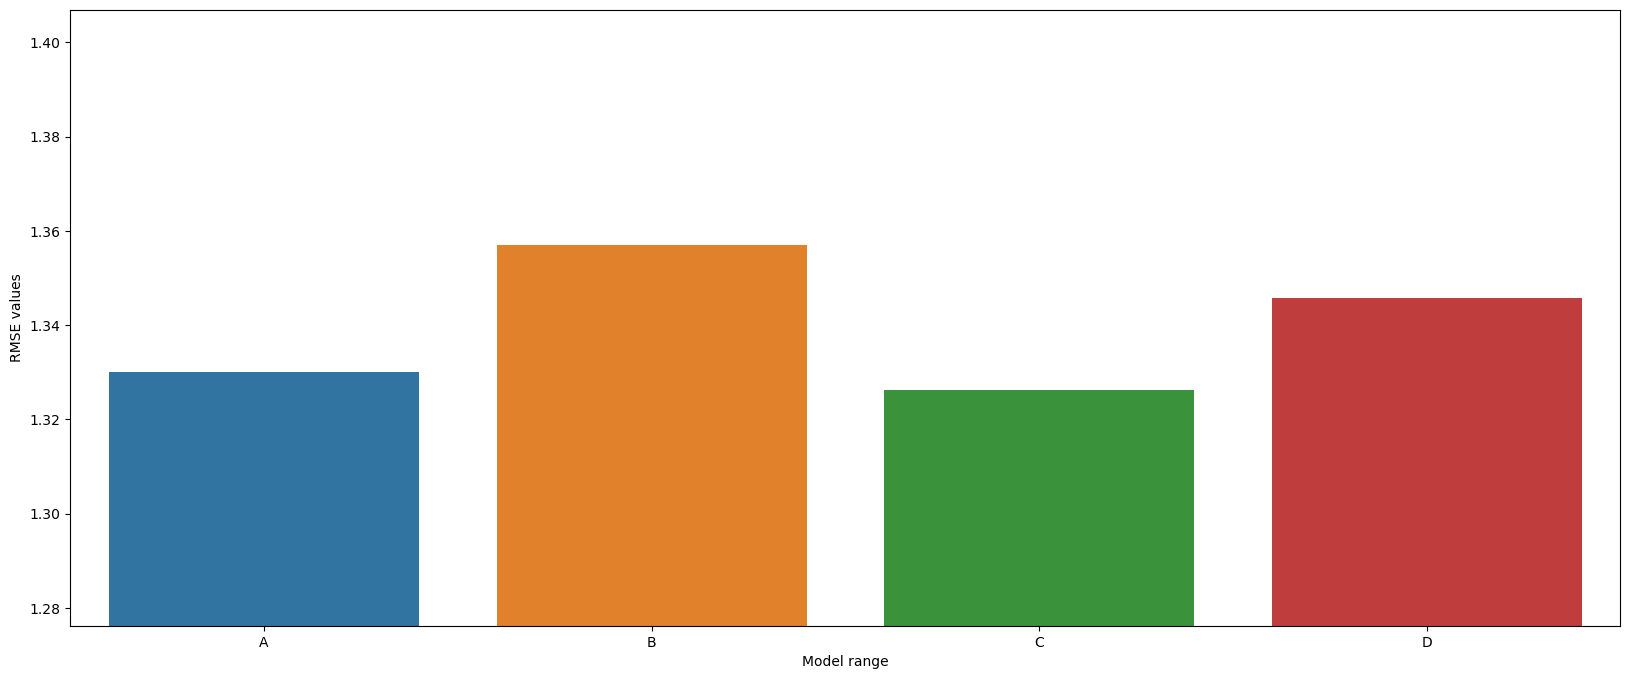

In [46]:
plt.figure(figsize = (20,8))#shows the width(20) and the legnth(8) of the date set
plt.ylim(min(msemod_square_checking) - 0.05, max(msemod_square_checking) + 0.05)# increases the value by .05 from the y axis
sns.barplot(x = check, y = msemod_square_checking)#establishes a bar graph x being the models and y is the rooted mse values.
plt.xlabel('Model range') #title for x axis
plt.ylabel('RMSE values') #title for y axis

## Comment

The seaborn function is utilised to establish a bar plot with the four models(x axis) and the rooted mse values(y-axis) the final prediction is still with the test set as model a with the rooted mse value of 1.33  and model c with the rooted mse value of 1.326 to have the lowest rmse value which means the two models are the most correlated. Model B and D rooted MSE values are 1.84 and 1.3457 which has the highest rmse value are the least correlated out of the four models which indicates the prediction is correct